In [2]:
#Import necessary libraries

import numpy as np
import pandas as pd
import seal
from seal import *
import time

In [3]:
#Read in genotype data

genotype_df = pd.read_csv("genotypes.txt.gz",header=None,delimiter="\t")
genotype_df

,0,1,2,3,4,5,6,7,8,9,...,2994,2995,2996,2997,2998,2999,3000,3001,3002,3003
0,1,91514,91515,rs376723915_A_C_0.426717,0,1,0,2,0,0,...,0,1,1,0,2,2,1,2,0,1
1,1,546801,546802,rs113633859_G_C_0.323283,0,0,0,0,2,0,...,1,1,0,1,2,0,0,0,0,1
2,1,568708,568709,rs148329687_A_G_0.189497,1,0,2,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,1,714018,714019,rs114983708_A_G_0.138379,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,743020,743021,rs3964475_T_C_0.107428,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20385,1,249157314,249157315,rs57752339_G_T_0.210663,0,0,0,1,0,1,...,0,1,0,0,2,0,0,0,0,0
20386,1,249168106,249168107,rs4926501_G_C_0.455072,1,0,2,1,1,1,...,2,1,2,2,2,1,0,0,1,0
20387,1,249182057,249182058,rs12566755_A_G_0.182308,1,0,1,1,1,1,...,2,1,1,1,0,0,0,0,1,0
20388,1,249201267,249201268,rs7544246_G_A_0.556909,1,0,2,1,1,2,...,2,2,1,2,1,0,0,1,2,1


In [4]:
#Read in sample id's

sample_ids = pd.read_csv("genotype_sample_ids.list",header=None)
sample_list = list(sample_ids[0])
sample_ids

,0
0,d8e4f50989cf4f4142627b2e01dde505eafe0cad
1,4d784bfc402f201b78efb2404ed7c8b9ebf2126a
2,81b832a049175854a6054c729e403e43bfb11bc6
3,f5edd61883f0e8b42a7cc77757419b4161c4aa9a
4,ccf1a224f9e5e3c4780dac429691b56593b723b3
...,...
2995,b70c53920c2b178c9d901d793e18423c8f338cd8
2996,bfc4179929025f9e8d877585e97e009cfa705aed
2997,cb2cd678bc0c62f30443514f98bf067e443c929e
2998,76e1d8e319e270e45f1cd0641c8842af6f9dd2b3


In [5]:
#Load Phenotype 1 data and set correct order

ph1 = pd.read_fwf("phenotypes_1.txt",header=None)
ph1.set_axis(['id','phenotype'],axis='columns',inplace=True)
ph1.set_index('id',inplace=True)
ph1 = ph1.loc[sample_list]
ph1

,phenotype
id,
d8e4f50989cf4f4142627b2e01dde505eafe0cad,0.023975
4d784bfc402f201b78efb2404ed7c8b9ebf2126a,-0.091981
81b832a049175854a6054c729e403e43bfb11bc6,-0.058663
f5edd61883f0e8b42a7cc77757419b4161c4aa9a,-0.007388
ccf1a224f9e5e3c4780dac429691b56593b723b3,-0.082941
...,...
b70c53920c2b178c9d901d793e18423c8f338cd8,-0.055793
bfc4179929025f9e8d877585e97e009cfa705aed,0.098337
cb2cd678bc0c62f30443514f98bf067e443c929e,-0.076302


In [6]:
#Load Phenotype 5 data and set correct order

ph5 = pd.read_fwf("phenotypes_5.txt",header=None)
ph5.set_axis(['id','phenotype'],axis='columns',inplace=True)
ph5.set_index('id',inplace=True)
ph5 = ph5.loc[sample_list]
ph5

,phenotype
id,
d8e4f50989cf4f4142627b2e01dde505eafe0cad,0
4d784bfc402f201b78efb2404ed7c8b9ebf2126a,0
81b832a049175854a6054c729e403e43bfb11bc6,0
f5edd61883f0e8b42a7cc77757419b4161c4aa9a,0
ccf1a224f9e5e3c4780dac429691b56593b723b3,0
...,...
b70c53920c2b178c9d901d793e18423c8f338cd8,0
bfc4179929025f9e8d877585e97e009cfa705aed,1
cb2cd678bc0c62f30443514f98bf067e443c929e,0


In [7]:
from sklearn.linear_model import Lasso, LogisticRegression

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.metrics import confusion_matrix, roc_curve, mean_squared_error, plot_roc_curve

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
X = genotype_df.T[4:]
X

,0,1,2,3,4,5,6,7,8,9,...,20380,20381,20382,20383,20384,20385,20386,20387,20388,20389
4,0,0,1,0,0,2,0,0,1,0,...,0,1,1,1,0,0,1,1,1,2
5,1,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,2,1,0,1,1,0,0,0,...,0,2,2,1,0,0,2,1,2,1
7,2,0,0,0,1,0,2,0,0,0,...,1,1,1,1,1,1,1,1,1,1
8,0,2,0,0,0,0,2,0,0,1,...,1,1,1,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,2,0,0,0,1,0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3000,1,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3001,2,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,2
3002,0,0,0,0,0,1,1,0,1,1,...,0,2,2,1,0,0,1,1,2,0


In [12]:
X_train, X_test, ph1_train, ph1_test = train_test_split(X, ph1, test_size=0.1, random_state=100)

In [13]:
lasso1 = Lasso(alpha=.001,max_iter=10000)

In [14]:
lasso1.fit(X_train,ph1_train)

Lasso(alpha=0.001, max_iter=10000)

In [15]:
pred1 = lasso1.predict(X_test)

Text(0, 0.5, 'Predicted Y')

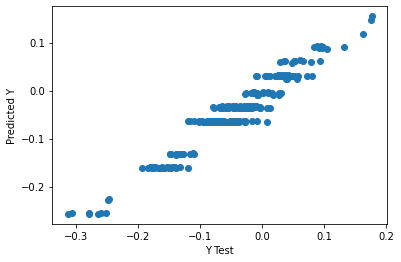

In [16]:
#Is this graph correct?
#Do the data lie on planes defined by the model?
#Suggests not enough nonzero coefficients, but this model had best RMSE.

plt.scatter(ph1_test,pred1)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [17]:
print('RMSE:', np.sqrt(mean_squared_error(ph1_test, pred1)))

RMSE: 0.020561293281397757


In [17]:
np.array(lasso1.coef_)

array([ 0.,  0.,  0., ..., -0., -0.,  0.])

In [18]:
lasso1.intercept_

array([-0.01389875])

In [18]:
np.count_nonzero(lasso1.coef_)

16

In [21]:
#Sparse representation of model data

model1_sp = []
for i in range(len(lasso1.coef_)):
    if np.abs(lasso1.coef_[i])>0.0001:
        model1_sp.append((i,lasso1.coef_[i]))
        
model1_sp.append((23090,lasso1.intercept_[0]))
        
model1_sp

[(2530, -0.09594326693038101),
 (2906, -0.00023953239373762045),
 (2908, -0.027723329242474185),
 (5103, 0.09524513109675836),
 (5718, -0.00011814664428488558),
 (11535, -0.00038552514059366784),
 (11729, -0.00013504882902836215),
 (12650, 0.0004911403370222782),
 (12656, 0.029666820079086196),
 (15801, -0.00015328567780543788),
 (18339, -0.00019747092515207218),
 (19945, 0.00047987345637532687),
 (23090, -0.007686869241236308)]

In [22]:
#DATA OWNER
#Set the parameters of the encryption context.

parms = EncryptionParameters(scheme_type.ckks)
poly_modulus_degree = 4096
parms.set_poly_modulus_degree(poly_modulus_degree)
parms.set_coeff_modulus(CoeffModulus.Create(poly_modulus_degree, [35, 30, 35]))
#320-bit coeff modulus Q. 
#From SEAL manual, security cutoffs for N=16384 are 300 bits for 192-bit security, 438 bits for 128-bit security.
scale = 2.0**30
context = SEALContext(parms)
#print_parameters(context)

print(CoeffModulus.MaxBitCount(poly_modulus_degree))

ckks_encoder = CKKSEncoder(context)
slot_count = ckks_encoder.slot_count()
print(f'Number of slots: {slot_count}')

keygen = KeyGenerator(context)
public_key = keygen.create_public_key()
secret_key = keygen.secret_key()
galois_keys = keygen.create_galois_keys()
relin_keys = keygen.create_relin_keys()

encryptor = Encryptor(context, public_key)
evaluator = Evaluator(context)

109
Number of slots: 2048


In [23]:
#Prepare plaintexts from data.
def sample_to_pt(sample):
    
    pt_data = np.zeros((12,2048))
    for i in range(len(sample)):
        pt_data[i // 2048, i%2048] = sample[i]
    
    #Add extra feature, always equal to 1.0, to multiply by model intercepts
    pt_data[11,562] = 1.0
    
    return pt_data

In [29]:
#NO LONGER USED

def dot_prod(ctlist1, ctlist2):
    temp_result = []
    for i in range(len(ctlist1)):
        temp_result.append(evaluator.multiply(ctlist1[i],ctlist2[i]))
        evaluator.relinearize_inplace(temp_result[i],relin_keys)
        evaluator.rescale_to_next_inplace(temp_result[i])
        #temp_result[i].scale()
        #evaluator.mod_switch_to_next_inplace(temp_result[i])
        for k in range(1,2048):
            evaluator.add_inplace(temp_result[i],evaluator.rotate_vector(temp_result[i],k,galois_keys))
            
        #evaluator.rescale_to_next_inplace(temp_result[i])
            
    result = evaluator.add_many(temp_result)
    
    return result
    

In [30]:
#NO LONGER USED, FOR TESTING ONLY

def prod(ctlist1, ctlist2):
    result = []
    for i in range(len(ctlist1)):
        result.append(evaluator.multiply(ctlist1[i],ctlist2[i]))
        evaluator.relinearize_inplace(result[i],relin_keys)
        evaluator.rescale_to_next_inplace(result[i])
        
    return result
    

In [26]:
#Prepare sparse model vecs to be encoded and encrypted
def sparse_model_vecs(model,slots):
    vecs = []
    batch = []
    index = []
    for item in model:
        empty = np.zeros(slots-1)
        batch.append(item[0]//slots)
        index.append(item[0]%slots)
        vecs.append(np.insert(empty,item[0]%slots,item[1]))
        
    return batch, vecs, index
    

In [24]:
def models_to_vecs(models,slots):
    
    vec_list = []
    for model in models:
        vecs = []
        batch = []
        index = []
        for item in model:
            empty = np.zeros(slots-1)
            batch.append(item[0]//slots)
            index.append(item[0]%slots)
            vecs.append(np.insert(empty,item[0]%slots,item[1]))
            
        vec_list.append([batch, vecs, index])
        
    return vec_list
        
            

In [150]:
#Test of multiplication with sparse model
start = time.time()

slots = 2048
model1_pt = []
model1_ct = []

batch_no, vecs, index = sparse_model_vecs(sparse_model1,slots)

for i in range(len(vecs)):
    model1_pt.append(ckks_encoder.encode(10**3 * vecs[i],scale))
    model1_ct.append(encryptor.encrypt(model1_pt[i]))
    
data_batch = sample_to_pt(X.loc[8])
data_pt = []
data_ct = []

for i in range(12):
    data_pt.append(ckks_encoder.encode(data_batch[i],scale))
    data_ct.append(encryptor.encrypt(data_pt[i]))

temp = []
for i in range(len(model1_ct)):
    temp.append(evaluator.multiply(model1_ct[i],data_ct[batch_no[i]]))
    evaluator.relinearize_inplace(temp[i],relin_keys)
    evaluator.rescale_to_next_inplace(temp[i])
    evaluator.rotate_vector_inplace(temp[i],index[i]-i,galois_keys)
    
result = evaluator.add_many(temp)

decryptor = Decryptor(context,secret_key)
result_pt = decryptor.decrypt(result)
ans = ckks_encoder.decode(result_pt)

end = time.time()
print(f"Time to encode, encrypt, evaluate, decode: {(end-start):.3f}s")

print(ans/10**3)

Time to encode, encrypt, evaluate, decode: 0.128s
[ 3.35583443e-07  1.28954896e-07 -1.00356454e-07 ...  1.02551284e-08
  1.96669657e-08 -1.82239890e-11]


In [119]:
test = []
for item in sparse_model1:
    test.append(item[1]*X.loc[8][item[0]])
    
test

[-0.0, -0.0, -0.0, -0.04860821218486035, 0.0, 0.0, 0.00030572818267761084]

In [151]:
#CORRECT!

ans[:15]/10**3

array([ 3.35583443e-07,  1.28954896e-07, -1.00356454e-07, -4.86081947e-02,
        3.94532142e-08, -4.33685184e-10,  3.05739283e-04, -1.33601818e-02,
        2.21162940e-09, -1.71801171e-08,  2.32285542e-08, -2.07852456e-08,
        1.05341370e-09,  1.29475443e-08, -2.58839298e-08])

In [126]:
np.max(ans)

0.30575575069048444

In [143]:
sparse_model_vecs(sparse_model1,2048)

([1, 1, 1, 1, 2, 6, 9, 11],
 [array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.])],
 [481, 482, 484, 860, 1007, 368, 1513, 562])

In [145]:
data_batch = sample_to_pt(np.concatenate((np.array(X.loc[8]),np.array([1.0]))))
data_batch[11][:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [146]:
23090//2048

11

In [152]:
#Test of evaluation of model 1 with sparse model
#Looks correct

start = time.time()

slots = 2048
model1_pt = []
model1_ct = []

batch_no, vecs, index = sparse_model_vecs(sparse_model1,slots)

for i in range(len(vecs)):
    model1_pt.append(ckks_encoder.encode(10**3 * vecs[i],scale))
    model1_ct.append(encryptor.encrypt(model1_pt[i]))
    
data_batch = sample_to_pt(np.concatenate((np.array(X.loc[8]),np.array([1.0]))))
data_pt = []
data_ct = []

for i in range(12):
    data_pt.append(ckks_encoder.encode(data_batch[i],scale))
    data_ct.append(encryptor.encrypt(data_pt[i]))

temp = []
for i in range(len(model1_ct)):
    temp.append(evaluator.multiply(model1_ct[i],data_ct[batch_no[i]]))
    evaluator.relinearize_inplace(temp[i],relin_keys)
    evaluator.rescale_to_next_inplace(temp[i])
    evaluator.rotate_vector_inplace(temp[i],index[i],galois_keys)
    
result = evaluator.add_many(temp)

decryptor = Decryptor(context,secret_key)
result_pt = decryptor.decrypt(result)
ans = ckks_encoder.decode(result_pt)

end = time.time()
print(f"Time to encode, encrypt, evaluate, decode: {(end-start):.3f}s")

print(ans/10**3)

Time to encode, encrypt, evaluate, decode: 0.083s
[-6.16624298e-02  1.85197417e-07 -1.29555607e-07 ...  2.29797305e-08
  1.56400872e-08 -3.31617732e-09]


In [74]:
#Test evaluation
start = time.time()

model1_pt = []
model1_ct = []

for i in range(12):
    model1_pt.append(ckks_encoder.encode(10**6 * model1_batch[i],scale))
    model1_ct.append(encryptor.encrypt(model1_pt[i]))
    
data_batch = sample_to_pt(X.loc[8])
data_pt = []
data_ct = []

for i in range(12):
    data_pt.append(ckks_encoder.encode(10**6 * data_batch[i],scale))
    data_ct.append(encryptor.encrypt(data_pt[i]))
    
result = dot_prod(model1_ct,data_ct)

decryptor = Decryptor(context,secret_key)
result_pt = decryptor.decrypt(result)
ans = ckks_encoder.decode(result_pt)

end = time.time()
print(f"Time to encode, encrypt, evaluate, decode: {(end-start):.3f}s")

print(ans)

    


Time to encode, encrypt, evaluate, decode: 38.201s
[ -56.5054166   167.70549819  406.60352961 ...  560.29528607 -215.48231623
 -229.44671037]


In [75]:
ans[:100]

array([ -56.5054166 ,  167.70549819,  406.60352961,  172.94576732,
         53.8225762 ,  198.18998567,  757.75592688,  305.66796746,
        199.79375981,  -85.63432078,  -55.65371374,   98.92101634,
       -161.11044133, -274.5431867 ,  385.9457194 ,  266.97625302,
        -47.58914219, -216.6136474 ,  351.35091001,  234.90914666,
       -128.52357651,  686.63221261,  649.88475135, -124.12759475,
       -175.38139087,  308.56435739,  -41.68365455, -172.0008828 ,
        -40.54997657, -688.70725252,  314.6969295 ,  108.56842266,
        -23.48469934, -104.21752937,  461.93377264, -344.81201172,
        762.50910953, -220.74678991, -145.70235506,  558.4538568 ,
        348.37588698, -188.41492347, -120.46565424,  169.29046709,
       -291.36982798, -176.83528177, -339.83012866, -990.28212315,
        158.81852768,  562.32669684, -641.32537147,  144.30444677,
        491.64819253, -198.09386015, -201.71354132, -268.23266158,
        550.18399602, -281.32337997,  133.15329963, -178.04009

In [54]:
# Test prod
#Test evaluation
start = time.time()


model1_pt = ckks_encoder.encode(model1_batch[0],scale)
model1_ct = encryptor.encrypt(model1_pt)
    
data_batch = sample_to_pt(X.loc[8])

data_pt = ckks_encoder.encode(data_batch[0],1.0)
data_ct = encryptor.encrypt(data_pt)
    
result = evaluator.multiply(model1_ct,data_ct)

decryptor = Decryptor(context,secret_key)
result_pt = decryptor.decrypt(result)
ans_no_relin = ckks_encoder.decode(result_pt)

end = time.time()
print(f"Time to encode, encrypt, evaluate, decode: {(end-start):.3f}s")

print(ans_no_relin)

Time to encode, encrypt, evaluate, decode: 0.059s
[ 3.88387742e-03 -2.85046627e-05  3.19306679e-04 ... -1.32615655e-04
 -7.32435940e-05  7.45223380e-06]


In [73]:
ans_no_relin[200:300]

array([ 1.18872901e-03,  6.22463202e-04,  1.92292504e-04, -1.21490942e-04,
       -8.78509303e-05,  5.97195494e-05, -1.68217867e-01, -9.67703908e-04,
        1.40667497e-04,  5.36548485e-06,  1.46609258e-05,  2.49886742e-04,
        7.31000182e-04, -5.68188038e-04, -1.05137497e-03,  2.51971060e-04,
       -2.36200900e-03, -1.62380285e-05,  2.07477997e-04, -3.14748748e-03,
        1.22470591e-04,  1.54917696e-04,  2.98216576e-04, -1.30333745e-04,
       -2.03396961e-04, -1.39854832e-04,  3.62448679e-05,  1.09362457e-04,
        9.37890591e-04, -6.30162159e-04,  9.98472513e-05,  2.12211067e-05,
       -1.77278006e-04,  3.69639400e-04, -2.11584648e-05,  1.81857911e-04,
       -1.90350701e-04,  3.16755087e-05, -2.22324816e-04, -7.36320622e-04,
        4.22314986e-05, -1.22452700e-04, -1.62090434e-04,  1.90976950e-04,
        3.44625721e-06,  1.42456946e-05,  2.79385940e-07,  1.31851208e-04,
        1.58525707e-05, -1.57767247e-04,  5.15028039e-05, -3.37673966e-04,
        6.32272132e-05,  

In [64]:
# Test prod
#Test evaluation
start = time.time()


model1_pt = ckks_encoder.encode(10**6 * model1_batch[0],scale)
model1_ct = encryptor.encrypt(model1_pt)
    
data_batch = sample_to_pt(X.loc[8])

data_pt = ckks_encoder.encode(data_batch[0],scale)
data_ct = encryptor.encrypt(data_pt)
    
result = evaluator.multiply(model1_ct,data_ct)
evaluator.relinearize_inplace(result,relin_keys)
evaluator.rescale_to_next_inplace(result)

decryptor = Decryptor(context,secret_key)
result_pt = decryptor.decrypt(result)
ans = ckks_encoder.decode(result_pt)

end = time.time()
print(f"Time to encode, encrypt, evaluate, decode: {(end-start):.3f}s")

print(ans)

Time to encode, encrypt, evaluate, decode: 0.060s
[ 9.75766653e-04 -1.63710735e-04 -7.40624551e-05 ... -1.39445378e-03
 -4.50194175e-04 -4.14862094e-04]


In [25]:
#Load Phenotype 1 data and set correct order

ph2 = pd.read_fwf("phenotypes_2.txt",header=None)
ph2.set_axis(['id','phenotype'],axis='columns',inplace=True)
ph2.set_index('id',inplace=True)
ph2 = ph2.loc[sample_list]
ph2

,phenotype
id,
d8e4f50989cf4f4142627b2e01dde505eafe0cad,0.277299
4d784bfc402f201b78efb2404ed7c8b9ebf2126a,-0.051629
81b832a049175854a6054c729e403e43bfb11bc6,-0.184121
f5edd61883f0e8b42a7cc77757419b4161c4aa9a,-0.220403
ccf1a224f9e5e3c4780dac429691b56593b723b3,-0.226222
...,...
b70c53920c2b178c9d901d793e18423c8f338cd8,-0.243067
bfc4179929025f9e8d877585e97e009cfa705aed,0.056884
cb2cd678bc0c62f30443514f98bf067e443c929e,-0.658462


In [26]:
X_train, X_test, ph2_train, ph2_test = train_test_split(X, ph2, test_size=0.1, random_state=100)

In [27]:
lasso2 = Lasso(alpha = .002, max_iter= 10000)

In [28]:
lasso2.fit(X_train,ph2_train)

Lasso(alpha=0.002, max_iter=10000)

In [29]:
pred = lasso2.predict(X_test)

Text(0, 0.5, 'Predicted Y')

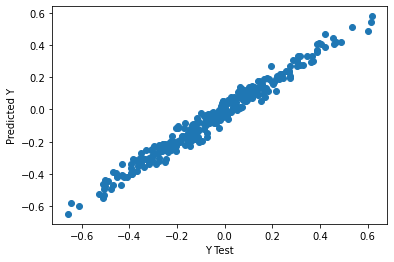

In [30]:


plt.scatter(ph2_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [31]:
print('RMSE:', np.sqrt(mean_squared_error(ph2_test, pred)))

RMSE: 0.03953388734273171


In [32]:
np.count_nonzero(lasso2.coef_)

13

In [33]:
model2_sp = []
for i in range(len(lasso2.coef_)):
    if lasso2.coef_[i]!=0:
        model2_sp.append((i,lasso2.coef_[i]))
        
model2_sp.append((23090,lasso2.intercept_[0]))
        
model2_sp

[(2946, 0.19607953660267063),
 (3429, -0.02176897268734839),
 (5640, -0.0035127889036494094),
 (5642, -0.12687742070673563),
 (6344, 0.07850916080654516),
 (7505, -0.00020108130021047866),
 (9212, -0.0006680240183042844),
 (10182, 0.1371112016502062),
 (10184, -0.0009310237102078503),
 (12027, 0.019720716496705475),
 (12028, 0.004363225509529124),
 (16862, -0.19363147560044056),
 (18453, -0.08188806207823272),
 (23090, -0.001772676772878727)]

In [50]:
models = [model1_sp,model2_sp]
models_to_vecs(models,2048)

[([1, 1, 1, 1, 2, 6, 9, 11],
  [array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.])],
  [481, 482, 484, 860, 1007, 368, 1513, 562]),
 ([1, 1, 2, 3, 4, 5, 8, 9, 11],
  [array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.])],
  [898, 1381, 1546, 200, 1990, 1787, 478, 21, 562])]

In [220]:
sparse_model_vecs(sparse_2,2048)

([1, 1, 2, 2, 3, 4, 5, 5, 8, 9, 11],
 [array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.])],
 [898, 1381, 1544, 1546, 200, 1990, 1787, 1788, 478, 21, 562])

In [221]:
#Test of evaluation of model 1 and 2


start = time.time()

slots = 2048
model1_pt = []
model1_ct = []
model2_pt = []
model2_ct = []

batch_no, vecs, index = sparse_model_vecs(sparse_model1,slots)
batch_no2, vecs2, index2 = sparse_model_vecs(sparse_2,slots)

for i in range(len(vecs)):
    model1_pt.append(ckks_encoder.encode(10**3 * vecs[i],scale))
    model1_ct.append(encryptor.encrypt(model1_pt[i]))
    
for i in range(len(vecs2)):
    model2_pt.append(ckks_encoder.encode(10**3 * vecs2[i],scale))
    model2_ct.append(encryptor.encrypt(model2_pt[i]))
    
data_batch = sample_to_pt(np.concatenate((np.array(X.loc[8]),np.array([1.0]))))
data_pt = []
data_ct = []

for i in range(12):
    data_pt.append(ckks_encoder.encode(data_batch[i],scale))
    data_ct.append(encryptor.encrypt(data_pt[i]))

temp = []
for i in range(len(model1_ct)):
    temp.append(evaluator.multiply(model1_ct[i],data_ct[batch_no[i]]))
    evaluator.relinearize_inplace(temp[i],relin_keys)
    evaluator.rescale_to_next_inplace(temp[i])
    evaluator.rotate_vector_inplace(temp[i],index[i],galois_keys)
    
for i in range(len(model2_ct)):
    temp.append(evaluator.multiply(model2_ct[i],data_ct[batch_no2[i]]))
    evaluator.relinearize_inplace(temp[i+len(model1_ct)],relin_keys)
    evaluator.rescale_to_next_inplace(temp[i+len(model1_ct)])
    evaluator.rotate_vector_inplace(temp[i+len(model1_ct)],index2[i]-1,galois_keys)
    
result = evaluator.add_many(temp)

decryptor = Decryptor(context,secret_key)
result_pt = decryptor.decrypt(result)
ans = ckks_encoder.decode(result_pt)

end = time.time()
print(f"Time to encode, encrypt, evaluate, decode: {(end-start):.3f}s")

print(ans/10**3)

Time to encode, encrypt, evaluate, decode: 0.470s
[-6.16624800e-02 -2.45977832e-01 -2.44769465e-07 ... -5.53096601e-09
 -1.62366310e-08  2.27484527e-08]


In [222]:
lasso2.predict(np.array(X.loc[8]).reshape(1,-1))

array([-0.24597802])

In [35]:
#Load Phenotype 3 data and set correct order

ph3 = pd.read_fwf("phenotypes_3.txt",header=None)
ph3.set_axis(['id','phenotype'],axis='columns',inplace=True)
ph3.set_index('id',inplace=True)
ph3 = ph3.loc[sample_list]
ph3

,phenotype
id,
d8e4f50989cf4f4142627b2e01dde505eafe0cad,-0.775620
4d784bfc402f201b78efb2404ed7c8b9ebf2126a,-0.564953
81b832a049175854a6054c729e403e43bfb11bc6,-0.724430
f5edd61883f0e8b42a7cc77757419b4161c4aa9a,-0.176628
ccf1a224f9e5e3c4780dac429691b56593b723b3,-0.312832
...,...
b70c53920c2b178c9d901d793e18423c8f338cd8,-0.661671
bfc4179929025f9e8d877585e97e009cfa705aed,-0.080737
cb2cd678bc0c62f30443514f98bf067e443c929e,0.402807


In [36]:
X_train, X_test, ph3_train, ph3_test = train_test_split(X, ph3, test_size=0.1, random_state=100)

In [55]:
lasso3 = Lasso(alpha = .002, max_iter=10000)

In [56]:
lasso3.fit(X_train, ph3_train)

Lasso(alpha=0.002, max_iter=10000)

In [57]:
pred = lasso3.predict(X_test)

Text(0, 0.5, 'Predicted Y')

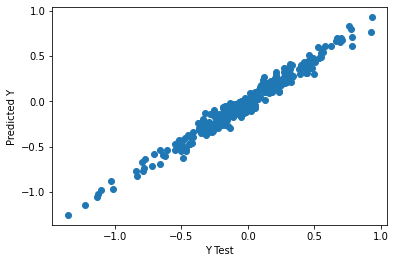

In [58]:
plt.scatter(ph3_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [59]:
print('RMSE:', np.sqrt(mean_squared_error(ph3_test, pred)))

RMSE: 0.06527473346415812


In [60]:
np.count_nonzero(lasso3.coef_)

221

In [63]:
model3_sp = []
for i in range(len(lasso3.coef_)):
    if np.abs(lasso3.coef_[i])>0.0005:
        model3_sp.append((i,lasso3.coef_[i]))
        
model3_sp.append((23090,lasso3.intercept_[0]))
        
model3_sp

[(112, 0.0005875311020307507),
 (158, -0.0007960992368817526),
 (679, -0.0006581523464006517),
 (702, -0.0008825346158053968),
 (784, 0.17859561080211672),
 (1073, 0.0015437628337134433),
 (1304, -0.000726251968061608),
 (1434, 0.0007963331761673687),
 (1448, -0.0006629212552236921),
 (1579, 0.0014868753777601625),
 (1669, -0.0005319005913297844),
 (2061, -0.17759609460306378),
 (2308, 0.2936509217754403),
 (2365, -0.0005611973787550934),
 (2760, -0.2381511909750274),
 (2783, -0.0009156506834404928),
 (2885, -0.002434341425197151),
 (2918, 0.001171449964014479),
 (3235, -0.0014387324188243477),
 (3297, 0.0019242549002537845),
 (3381, -0.0005342081954817187),
 (3661, 0.0007641326091820366),
 (3779, -0.000867598977294349),
 (3805, 0.004326386638738263),
 (3907, 0.0013022217039585704),
 (3911, -0.0011738266033979221),
 (4023, -0.003659049476327962),
 (4203, -0.002795874053363093),
 (4204, -0.07097580633643012),
 (4206, -0.0030821380527591407),
 (4207, -0.0007245478848252041),
 (4216, 0.00

In [64]:
len(model3_sp)

126

In [65]:
#Load Phenotype 4 data and set correct order

ph4 = pd.read_fwf("phenotypes_4.txt",header=None)
ph4.set_axis(['id','phenotype'],axis='columns',inplace=True)
ph4.set_index('id',inplace=True)
ph4 = ph4.loc[sample_list]
ph4

,phenotype
id,
d8e4f50989cf4f4142627b2e01dde505eafe0cad,1
4d784bfc402f201b78efb2404ed7c8b9ebf2126a,1
81b832a049175854a6054c729e403e43bfb11bc6,1
f5edd61883f0e8b42a7cc77757419b4161c4aa9a,1
ccf1a224f9e5e3c4780dac429691b56593b723b3,0
...,...
b70c53920c2b178c9d901d793e18423c8f338cd8,1
bfc4179929025f9e8d877585e97e009cfa705aed,1
cb2cd678bc0c62f30443514f98bf067e443c929e,1


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, plot_roc_curve

In [67]:
y = np.array(ph4).ravel()

In [68]:
X_train, X_test, ph4_train, ph4_test = train_test_split(X, y, test_size=0.1, random_state=100)

In [105]:
log4 = LogisticRegression(penalty='l1',solver='liblinear',C=.04)

In [106]:
log4.fit(X_train,ph4_train)

LogisticRegression(C=0.04, penalty='l1', solver='liblinear')

In [107]:
pred = log4.predict(X_test)

In [108]:
print(confusion_matrix(ph4_test,pred))

[[ 95  17]
 [  6 182]]


In [109]:
roc_auc_score(ph4_test,log4.decision_function(X_test))

0.9859422492401216

In [110]:
np.count_nonzero(log4.coef_)

69

In [210]:
log4.coef_[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [112]:
model4_sp = []
for i in range(len(log4.coef_[0])):
    if np.abs(log4.coef_[0][i])>.001:
        model4_sp.append((i,log4.coef_[0][i]))
        
#model4_sp.append((23090,log4.intercept_[0]))
        
model4_sp

[(1006, 0.013294404276214193),
 (2010, -0.0091919107768708),
 (2153, -0.02859911128037628),
 (2389, -0.01716651758875276),
 (3821, 0.10487286252619384),
 (3825, -0.2765668522543183),
 (3836, -0.018888949904724988),
 (3854, -0.0193667567714055),
 (4229, 0.023340222490774644),
 (4285, -0.03891023951296149),
 (4745, -0.009963692263354921),
 (4766, 0.005876266368121614),
 (4876, 0.003588466143146422),
 (5012, 1.6574826092177595),
 (5097, 0.007461414159637808),
 (5190, -0.03411022945408728),
 (6576, -0.01448286502101503),
 (6636, 0.013799346167331847),
 (6999, -0.005157646364959886),
 (7403, -0.036036052668057796),
 (8525, 0.008620574184805734),
 (8711, 0.0015078818430716324),
 (8799, -1.9586001884712747),
 (9397, 0.002812271638557952),
 (9413, -0.006187741204509922),
 (10145, -0.0035930076618460073),
 (10341, 0.3120460463800189),
 (10342, 1.011489427963965),
 (10542, 0.02371141348839449),
 (10848, 0.03209574595317049),
 (11239, -0.006682167359692101),
 (11826, 0.011756339796673135),
 (1220

In [113]:
#Load Phenotype 5 data and set correct order

ph5 = pd.read_fwf("phenotypes_5.txt",header=None)
ph5.set_axis(['id','phenotype'],axis='columns',inplace=True)
ph5.set_index('id',inplace=True)
ph5 = ph5.loc[sample_list]
ph5

,phenotype
id,
d8e4f50989cf4f4142627b2e01dde505eafe0cad,0
4d784bfc402f201b78efb2404ed7c8b9ebf2126a,0
81b832a049175854a6054c729e403e43bfb11bc6,0
f5edd61883f0e8b42a7cc77757419b4161c4aa9a,0
ccf1a224f9e5e3c4780dac429691b56593b723b3,0
...,...
b70c53920c2b178c9d901d793e18423c8f338cd8,0
bfc4179929025f9e8d877585e97e009cfa705aed,1
cb2cd678bc0c62f30443514f98bf067e443c929e,0


In [114]:
y = np.array(ph5).ravel()

In [115]:
X_train, X_test, ph5_train, ph5_test = train_test_split(X, y, test_size=0.1, random_state=100)

In [174]:
log5 = LogisticRegression(penalty='l1',solver='liblinear',C=.055)

In [175]:
log5.fit(X_train,ph5_train)

LogisticRegression(C=0.055, penalty='l1', solver='liblinear')

In [176]:
pred = log5.predict(X_test)

In [177]:
print(confusion_matrix(ph5_test,pred))

[[147  12]
 [ 13 128]]


In [178]:
roc_auc_score(ph5_test,log5.decision_function(X_test))

0.9810874704491725

In [179]:
np.count_nonzero(log5.coef_)

143

In [180]:
model5_sp = []
for i in range(len(log5.coef_[0])):
    if np.abs(log5.coef_[0][i])>=0.001:
        model5_sp.append((i,log5.coef_[0][i]))
        
#model5_sp.append((23090,log5.intercept_[0]))
        
model5_sp

[(46, -0.019338520445004368),
 (197, 0.006367984541303016),
 (243, -0.018537804657201624),
 (400, -0.00309471958584404),
 (506, -0.011933493982416924),
 (598, -0.027031552853127156),
 (769, 0.03807560644972986),
 (783, -0.009869890301699559),
 (840, 0.00961741172904517),
 (841, 0.014365318344705147),
 (842, 0.3577219364250562),
 (973, -0.0019451011089870118),
 (1446, 0.00578745224274152),
 (1761, -0.010967092084595372),
 (1767, -1.2146865948870744),
 (1909, -0.01918060697713192),
 (1935, -0.026044165388651508),
 (1941, -0.0021828689574148706),
 (1943, -0.0034040504703318326),
 (2058, 1.50163321150943),
 (2475, 0.03302466903113681),
 (2479, 0.028062239026251393),
 (2771, 0.0042501347261672),
 (3017, 2.764933082274891),
 (3108, -0.01794565550279759),
 (4211, -0.007364781090367042),
 (4221, 0.4174362977998136),
 (4222, 0.42393350366140803),
 (4223, 0.42428653981251047),
 (4224, 0.45156655351346675),
 (4344, 0.021845184676518394),
 (4685, 0.7169926320205213),
 (4750, -0.00203308506993271),

In [181]:
len(model5_sp)

136

In [191]:
models = [model1_sp,model2_sp,model3_sp,model4_sp,model5_sp]

model_data = models_to_vecs(models,2048)
model_data

[[[1, 1, 1, 2, 2, 5, 5, 6, 6, 7, 8, 9, 11],
  [array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.])],
  [482, 858, 860, 1007, 1622, 1295, 1489, 362, 368, 1465, 1955, 1513, 562]],
 [[1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 8, 9, 11],
  [array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   array([0

In [97]:
len(models[4])

176

In [156]:
#Test of evaluation of all models


start = time.time()

slots = 2048
models = [model1_sp,model2_sp,model3_sp,model4_sp,model5_sp]

model_data = models_to_vecs(models,slots)
models_ct = model_data


for i in range(len(models_ct)):
    for j in range(len(models_ct[i][0])):
        vec_pt = ckks_encoder.encode(10**3 * models_ct[i][1][j],scale)
        models_ct[i][1][j] = encryptor.encrypt(vec_pt)
    
    
data_batch = sample_to_pt(np.concatenate((np.array(X_test.iloc[0]),np.array([1.0]))))
data_pt = []
data_ct = []

for i in range(12):
    data_pt.append(ckks_encoder.encode(data_batch[i],scale))
    data_ct.append(encryptor.encrypt(data_pt[i]))

temp = []
for i in range(len(models_ct)):
    for j in range(len(models_ct[i][0])):
        
        temp.append(evaluator.multiply(models_ct[i][1][j],data_ct[models_ct[i][0][j]]))
        evaluator.relinearize_inplace(temp[len(temp)-1],relin_keys)
        evaluator.rescale_to_next_inplace(temp[len(temp)-1])
        evaluator.rotate_vector_inplace(temp[len(temp)-1],models_ct[i][2][j]-i,galois_keys)
    
    
result = evaluator.add_many(temp)

decryptor = Decryptor(context,secret_key)
result_pt = decryptor.decrypt(result)
ans = ckks_encoder.decode(result_pt)

end = time.time()
print(f"Time to encode, encrypt, evaluate, decode: {(end-start):.3f}s")

print(ans/10**3)

Time to encode, encrypt, evaluate, decode: 4.579s
[-3.77229506e-02 -2.53024110e-01  5.77533274e-01 ... -1.48881623e-07
 -1.08409073e-07 -3.01241332e-08]


In [157]:
ans[:10]/10**3

array([-3.77229506e-02, -2.53024110e-01,  5.77533274e-01,  1.75117902e+00,
        1.97488721e+00,  3.73644958e-07, -1.08964453e-07, -1.08822108e-09,
       -7.77505264e-08, -3.03192792e-08])

In [158]:
lasso1.predict(np.array(X_test.iloc[0]).reshape(1,-1))

array([-0.0377355])

In [160]:
lasso2.predict(np.array(X_test.iloc[0]).reshape(1,-1))

array([-0.25300878])

In [84]:
lasso3.predict(np.array(X.loc[8]).reshape(1,-1))

array([-0.23517828])

In [161]:
log4.decision_function(np.array(X_test.iloc[0]).reshape(1,-1))

array([1.75033408])

In [100]:
log5.decision_function(np.array(X.loc[8]).reshape(1,-1))

array([-0.39560322])

In [115]:
ph5[:10]

,phenotype
id,
d8e4f50989cf4f4142627b2e01dde505eafe0cad,0
4d784bfc402f201b78efb2404ed7c8b9ebf2126a,0
81b832a049175854a6054c729e403e43bfb11bc6,0
f5edd61883f0e8b42a7cc77757419b4161c4aa9a,0
ccf1a224f9e5e3c4780dac429691b56593b723b3,0
40b14a5b660779d63984fdbbb4d6f46adff61e2d,1
ec7a2a6acf842f4d8d35025c01596ca8f38840e8,1
6f743b93744fd311ac6e8c0695ca8f4d427ec8b2,1
6bf77562da2f6d0a0be7c1f89fa62c6ba89ddf3d,0


In [105]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,20380,20381,20382,20383,20384,20385,20386,20387,20388,20389
1277,1,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1384,2,0,0,0,1,0,2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
360,0,0,2,2,0,1,0,0,1,0,...,1,2,2,2,2,1,2,0,2,2
1924,0,2,1,0,0,2,1,0,1,2,...,0,1,1,2,1,1,2,1,2,1
565,1,1,0,0,0,1,1,0,1,1,...,0,1,1,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,2,0,0,0,0,2,0,0,0,...,0,2,2,2,1,1,1,0,1,1
887,1,0,1,1,0,0,2,1,0,1,...,0,1,1,0,2,2,2,1,2,2
2363,2,0,0,1,0,0,2,0,0,0,...,0,1,1,1,0,0,0,0,0,1
1784,1,0,0,0,0,0,2,0,0,0,...,0,1,1,1,0,0,1,0,1,1


0        1
1        0
2        0
3        0
4        0
        ..
20385    0
20386    0
20387    0
20388    0
20389    1
Name: 1277, Length: 20390, dtype: object

In [183]:
#ATTEMPT TO EVALUATE ALL MODELS AND PLACE RESULTS INTO SINGLE CIPHERTEXT
#THIS DID NOT EVALUATE CORRECTLY (TOO MUCH NOISE?)
#NOT CURRENTLY USED

start = time.time()

slots = 2048
models_ct = model_data


for i in range(len(models_ct)):
    for j in range(len(models_ct[i][0])):
        vec_pt = ckks_encoder.encode(10**3 * models_ct[i][1][j],scale)
        models_ct[i][1][j] = encryptor.encrypt(vec_pt)

result = []
for m in range(300):
    
    data_batch = sample_to_pt(np.concatenate((np.array(X.iloc[m]),np.array([1.0]))))
    data_pt = []
    data_ct = []

    for i in range(12):
        data_pt.append(ckks_encoder.encode(data_batch[i],scale))
        data_ct.append(encryptor.encrypt(data_pt[i]))

    temp = []
    for i in range(len(models_ct)):
        for j in range(len(models_ct[i][0])):
        
            temp.append(evaluator.multiply(models_ct[i][1][j],data_ct[models_ct[i][0][j]]))
            evaluator.relinearize_inplace(temp[len(temp)-1],relin_keys)
            evaluator.rescale_to_next_inplace(temp[len(temp)-1])
            evaluator.rotate_vector_inplace(temp[len(temp)-1],models_ct[i][2][j]-i-5*m,galois_keys)
    
    
    result.append(evaluator.add_many(temp))
    
all_results = evaluator.add_many(result)

decryptor = Decryptor(context,secret_key)
result_pt = decryptor.decrypt(all_results)
ans = ckks_encoder.decode(result_pt)

end = time.time()
print(f"Time to encode, encrypt, evaluate, decode: {(end-start):.3f}s")

print(ans/10**3)

Time to encode, encrypt, evaluate, decode: 389.064s
[-0.34738376  0.34412837  0.02149955 ...  0.14677856 -0.70200868
 -0.45759531]


In [119]:
lasso1.predict(np.array(X_test.iloc[0]).reshape(1,-1))

array([-0.0377355])

In [120]:
lasso2.predict(np.array(X_test.iloc[0]).reshape(1,-1))

array([-0.25300878])

In [121]:
lasso3.predict(np.array(X_test.iloc[0]).reshape(1,-1))

array([0.58656737])

In [186]:
#Evaluation of 5 models on 300 test samples.
#Returns 300 vectors, one for each sample, whose first 5 entries are the 5 model predictions *1000
#all other entries are small noise.
#Takes 5-6 minutes

start = time.time()

slots = 2048
models = [model1_sp,model2_sp,model3_sp,model4_sp,model5_sp]

model_data = models_to_vecs(models,slots)
models_ct = model_data


for i in range(len(models_ct)):
    for j in range(len(models_ct[i][0])):
        vec_pt = ckks_encoder.encode(10**3 * model_data[i][1][j],scale)
        models_ct[i][1][j] = encryptor.encrypt(vec_pt)

result = []
for m in range(300):
    
    data_batch = sample_to_pt(np.concatenate((np.array(X_test.iloc[m]),np.array([1.0]))))
    data_pt = []
    data_ct = []

    for i in range(12):
        data_pt.append(ckks_encoder.encode(data_batch[i],scale))
        data_ct.append(encryptor.encrypt(data_pt[i]))

    temp = []
    for i in range(len(models_ct)):
        for j in range(len(models_ct[i][0])):
        
            temp.append(evaluator.multiply(models_ct[i][1][j],data_ct[models_ct[i][0][j]]))
            evaluator.relinearize_inplace(temp[len(temp)-1],relin_keys)
            evaluator.rescale_to_next_inplace(temp[len(temp)-1])
            evaluator.rotate_vector_inplace(temp[len(temp)-1],models_ct[i][2][j]-i,galois_keys)
    
    
    result.append(evaluator.add_many(temp))
    

decryptor = Decryptor(context,secret_key)
ans = []
for i in range(300):
    ans.append(decryptor.decrypt(result[i]))
    ans[i] = ckks_encoder.decode(ans[i])
        

end = time.time()
print(f"Time to encode, encrypt, evaluate, decode: {(end-start):.3f}s")

#print(ans/10**3)

Time to encode, encrypt, evaluate, decode: 350.357s


In [180]:
ans

[array([-3.77231630e+01, -2.53023954e+02,  5.77533384e+02, ...,
        -6.12030919e-05, -7.04335755e-05,  2.98288804e-05]),
 array([-3.38329174e+01, -4.58090005e+02, -6.62655366e+01, ...,
         2.01806699e-05,  1.70563516e-05,  2.04153853e-05]),
 array([-1.54949884e+02, -2.01986944e+02, -3.43059498e+00, ...,
         4.93234214e-05, -1.90201768e-04, -8.31459924e-05]),
 array([-1.27618484e+02, -3.22642865e+02,  2.90130829e+02, ...,
         1.75519896e-05, -2.26011008e-06, -6.62999901e-05]),
 array([ 1.04854262e+02,  1.73532960e+02, -1.05278371e+02, ...,
        -4.45380575e-05, -2.16853904e-05,  1.20418565e-04]),
 array([-3.38330741e+01, -4.37746699e+00, -5.88490342e+01, ...,
        -1.05494655e-04, -2.37694935e-04,  1.57475572e-05]),
 array([-3.70005978e+01, -1.56513124e+02,  2.71115069e+01, ...,
        -3.99075794e-05, -9.09907980e-05,  4.97016646e-05]),
 array([-6.51236478e+01, -2.38856448e+02, -1.02546137e+02, ...,
         5.44907834e-05,  4.32800043e-05,  5.28256865e-05]),


In [187]:
#Form predictions

predictions = np.zeros((300,5))

for i in range(300):
    for j in range(5):
        predictions[i,j] = ans[i][j]/10**3

In [188]:
#Check scores

print('PH1 RMSE:', np.sqrt(mean_squared_error(ph1_test, predictions[:,0])))
print('PH2 RMSE:', np.sqrt(mean_squared_error(ph2_test, predictions[:,1])))
print('PH3 RMSE:', np.sqrt(mean_squared_error(ph3_test, predictions[:,2])))
print('PH4 ROC: ', roc_auc_score(ph4_test,predictions[:,3]))
print('PH5 ROC: ', roc_auc_score(ph5_test,predictions[:,4]))

PH1 RMSE: 0.020555862188751484
PH2 RMSE: 0.039533460219781484
PH3 RMSE: 0.06559132985069334
PH4 ROC:  0.9859422492401216
PH5 ROC:  0.9811766804942237


In [185]:
#ANOTHER ATTEMPT TO PUT ALL RESULTS IN SINGLE CIPHERTEXT
#NOT FASTER AND DOESN'T EVALUATE CORRECTLY

start = time.time()

slots = 2048
models = [model1_sp,model2_sp,model3_sp,model4_sp,model5_sp]

model_data = models_to_vecs(models,slots)
models_ct = model_data


for i in range(len(models_ct)):
    for j in range(len(models_ct[i][0])):
        vec_pt = ckks_encoder.encode(10**3 * model_data[i][1][j],scale)
        models_ct[i][1][j] = encryptor.encrypt(vec_pt)

result = []
for m in range(300):
    
    data_batch = sample_to_pt(np.concatenate((np.array(X_test.iloc[m]),np.array([1.0]))))
    data_pt = []
    data_ct = []

    for i in range(12):
        data_pt.append(ckks_encoder.encode(data_batch[i],scale))
        data_ct.append(encryptor.encrypt(data_pt[i]))

    temp = []
    for i in range(len(models_ct)):
        for j in range(len(models_ct[i][0])):
        
            temp.append(evaluator.multiply(models_ct[i][1][j],data_ct[models_ct[i][0][j]]))
            evaluator.relinearize_inplace(temp[len(temp)-1],relin_keys)
            evaluator.rescale_to_next_inplace(temp[len(temp)-1])
            evaluator.rotate_vector_inplace(temp[len(temp)-1],models_ct[i][2][j]-i-5*m,galois_keys)
    
    
    result.append(evaluator.add_many(temp))
    
all_results = evaluator.add_many(result)

decryptor = Decryptor(context,secret_key)
all_results_pt = decryptor.decrypt(all_results)
final = ckks_encoder.decode(all_results_pt)
        

end = time.time()
print(f"Time to encode, encrypt, evaluate, decode: {(end-start):.3f}s")

print(final/10**3)

Time to encode, encrypt, evaluate, decode: 355.114s
[ 0.50072039  1.2785791   0.54204035 ...  0.16046565 -0.43165462
  1.7195994 ]


In [189]:
import pickle

In [196]:
#Save all sparse model data

pickle.dump(models,open('models.dump','wb'))